In [44]:
import dvu
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import clean
import viz

plt.style.use('default')
dvu.set_style()

df = pd.read_pickle('../data/cdis_with_schemas.pkl')

In [45]:
d = df

# remove formulaic outputs
d = d[~d['purpose_en'].apply(lambda x: 'Formula' in x)]

In [46]:
# x = d[d.url == 'cha2ds2-vasc-score-atrial-fibrillation-stroke-risk'].iloc[0]
x = d.iloc[0]
schema = x['input_schema']
schema

[{'optional': False,
  'default': 0,
  'show_points': True,
  'conditionality': '',
  'name': 'alert',
  'tips_en': 'May ask patient to state name and address to help with rating',
  'label_en': '<p>Alertness</p>',
  'type': 'radio',
  'options': [{'label': 'Normal', 'value': 0},
   {'label': 'Mild sleepiness for <10 seconds after waking, then normal',
    'value': 0},
   {'label': 'Clearly abnormal', 'value': 4}]},
 {'optional': False,
  'default': 0,
  'show_points': True,
  'conditionality': '',
  'name': 'amt',
  'tips_en': 'Age, date of birth, place (name of the hospital or building), current year',
  'label_en': '<p><calculator id="3995">AMT 4</calculator></p>',
  'type': 'radio',
  'options': [{'label': 'No mistakes', 'value': 0},
   {'label': '1 mistake', 'value': 1},
   {'label': '≥2 mistakes or untestable', 'value': 2}]},
 {'optional': False,
  'default': 0,
  'show_points': True,
  'conditionality': '',
  'name': 'atte',
  'tips_en': 'Instruct patient to list months in rever

In [47]:
for s in schema:
    options = s['options']
    print(s['name'], clean.clean_feature_name(s['label_en']), [opt['value'] for opt in options])

alert Alertness [0, 0, 4]
amt AMT 4 [0, 1, 2]
atte Attention [0, 1, 2]
acute Acute change or fluctuating course [0, 4]


**Get feature names as list**

In [48]:
def get_feature_names_with_vals_list(schema):
    if isinstance(schema, list):
        feature_names_with_vals = []
        for s in schema:
            feature_name = clean.clean_feature_name(s['label_en']) if 'label_en' in s else 'unknown'
            feature_name = clean.rename_feature_name(feature_name)
            if 'options' in s:
                vals = [opt['value'] for opt in s['options']]
                val_range = max(vals) - min(vals)
            else:
                val_range = None
            feature_names_with_vals.append((feature_name, val_range))
        return feature_names_with_vals
    else:
        return []


df['feature_names_with_vals'] = df['input_schema'].apply(get_feature_names_with_vals_list)

In [49]:
df['feature_names_with_vals']

0      [(Alertness, 4), (AMT 4, 2), (Attention, 2), (...
1      [(Age, None), (Sex, 2), (Chronic respiratory d...
2      [(Age, 7), (Sex at birth, 1), (Number of comor...
3      [(Thrombocytopenia, 2), (Timing of platelet co...
4      [(Sex, 1), (Height, None), (Age, None), (Weigh...
                             ...                        
640                                [(Bicarbonate, None)]
641    [(unknown, None), (Any loose or watery stools,...
642                                [(Classification, 2)]
643    [(Pregnant patient, 1), (unknown, None), (Clin...
644                                                   []
Name: feature_names_with_vals, Length: 644, dtype: object

**Clean the feature names**

In [41]:
words = df['feature_names'].apply(clean.clean_feature_names_list)
all_words = sum(words, [])  # concatenate all list

all_words = pd.Series(all_words)
all_words = all_words[~(all_words == 'unknown')]
counts = all_words.value_counts()

KeyError: 'feature_names'

In [28]:
feat_names = pd.Series(counts.index).apply(lambda x: x[:39])
for feat_name in sorted(feat_names):
    print(feat_name)
# print(sorted(feat_names))


 >1 extranodal site
 Age at diagnosis, years (A)
 HLA match group
 Hemophagocytosis features on bone marr
 Motor response
 Pupil response
% alcohol
% bands
% basophils
% myeloblasts in peripheral blood
% neutrophils
% of reticulocytes
&ge;2 sites of metastasis
&gt;3 hrs from symptom onset (or last t
0.45% saline
0.9% saline
1. Anxious mood: Worries, anticipation 
1. Felt low in spirits or sad?
1. I have been less alert.
1. Sleep onset insomnia:
10 . Respiratory symptoms: Pressure or 
10. Concentration/decision making:
10. Dysarthria
10. I have had trouble maintaining phys
100 mEq NaHCO₃ in 1L D5W
10: Dysarthria
10a. Suffered from reduced appetite?
10b. Suffered from increased appetite?
11. Extinction and inattention
11. Gastrointestinal symptoms: Difficul
11. I have had difficulty making decisi
11. Outlook (self):
11: Extinction/inattention
11: Test extinction/inattention/neglect
12. Genitourinary symptoms: Frequency o
12. I have been less motivated to do an
12. Suicidal ideation:
13.

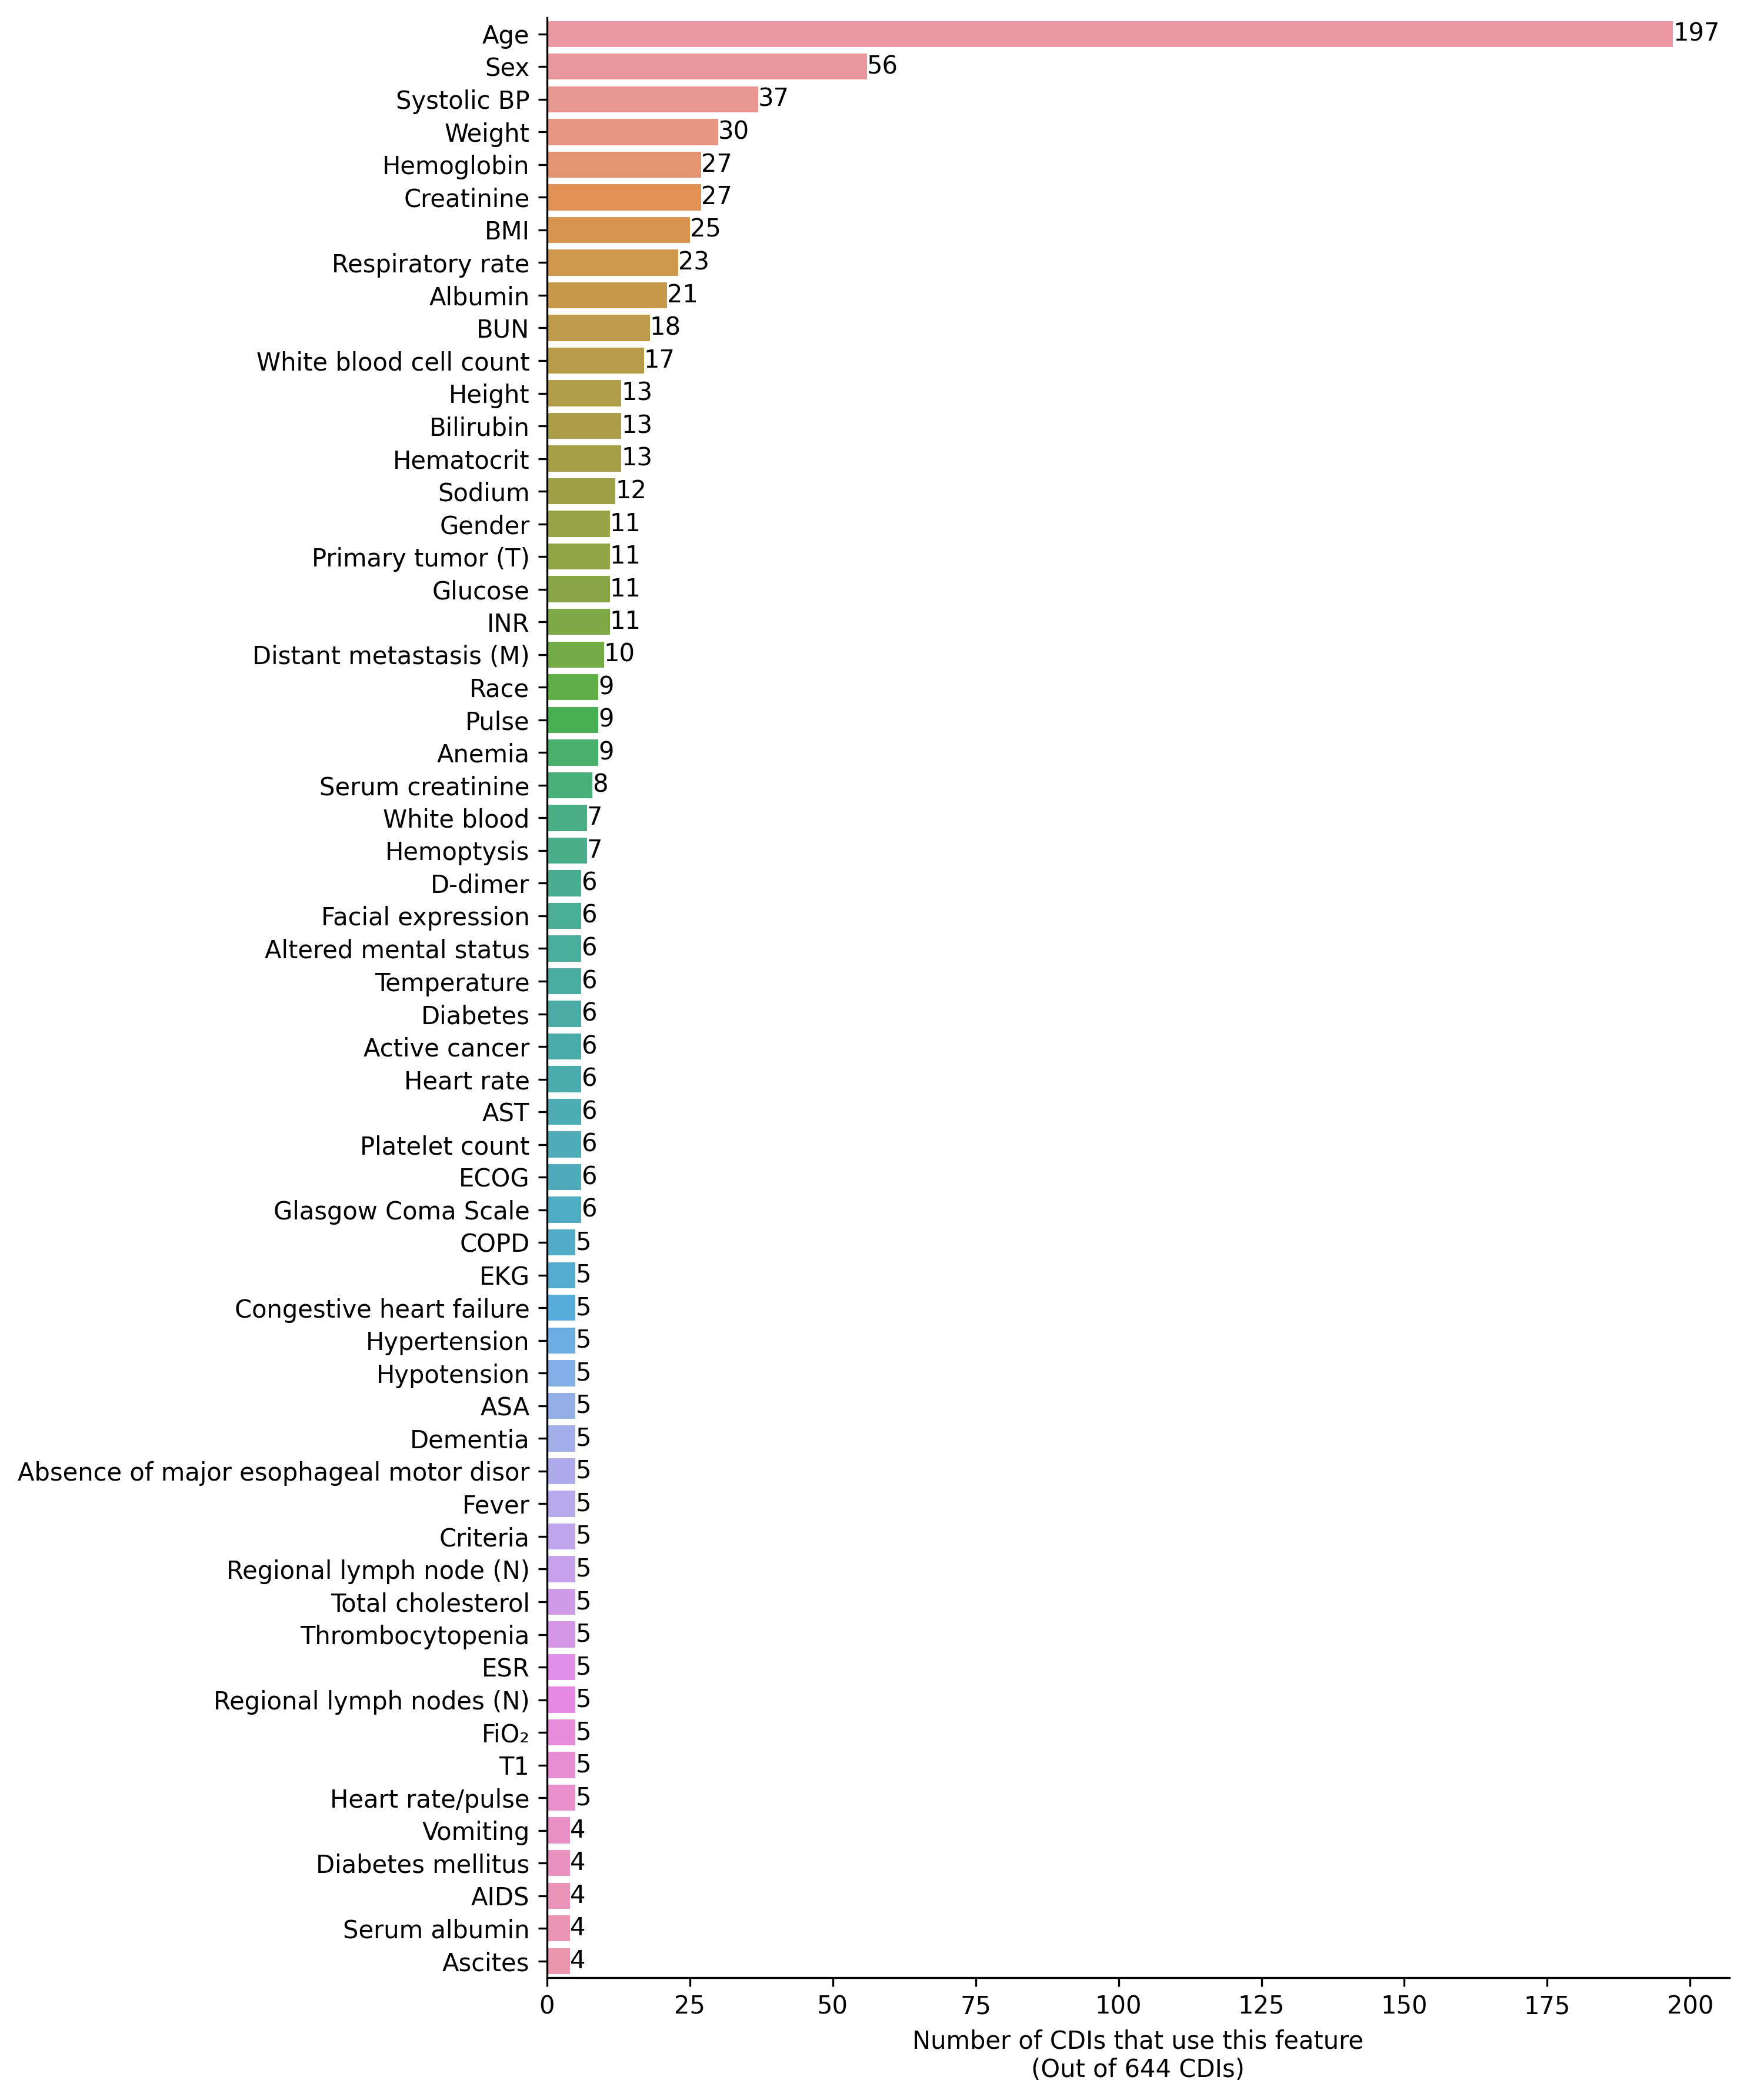

In [29]:
plt.figure(figsize=(10, 12), dpi=300, facecolor='w')
N = 60
# plt.grid()
ax = sns.barplot(y=feat_names[:N],
                 x=counts.values[:N], orient='h')
ax.bar_label(ax.containers[0])
plt.xlabel(f'Number of CDIs that use this feature\n(Out of {df.shape[0]} CDIs)')
plt.tight_layout()
viz.savefig('common_features')